In [6]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=d3ce17c9f29d989bb952e28c5c781af34d39408682bea10ad5bc1213df745802
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import ta
data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^RUI,^RUI,^RUI,^RUI,^RUI
Date,,,,,
2012-03-12,759.130005,760.619995,756.840027,759.429993,0
2012-03-13,772.979980,773.030029,761.450012,761.450012,0
2012-03-14,771.630005,774.679993,769.280029,773.190002,0
2012-03-15,776.419983,776.469971,770.739990,772.380005,0
2012-03-16,777.130005,778.099976,775.640015,776.559998,0
2012-03-19,780.090027,782.549988,776.070007,777.119995,0
2012-03-20,777.369995,778.299988,773.119995,778.030029,0
2012-03-21,776.150024,778.650024,774.760010,777.559998,0


In [11]:
data.columns = data.columns.droplevel(1) # drop the multi-level columns

In [14]:
# Adding indicators
data['RSI']=ta.momentum.rsi(data['Close'], window=15)
data['EMAF']=ta.trend.ema_indicator(data['Close'], window=20)
data['EMAM']=ta.trend.ema_indicator(data.Close, window=100)
data['EMAS']=ta.trend.ema_indicator(data.Close, window=150)

data['Target'] = data['Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

<ipython-input-14-f69c0bd1bc32>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [15]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

Price,High,Low,Open,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,795.679993,789.760010,791.440002,46.877256,795.406521,774.100513,768.874662,-2.690002,0,787.179993
1,792.669983,785.640015,789.869995,44.575540,794.623042,774.359513,769.117117,6.260010,1,793.440002
2,794.020020,786.260010,787.179993,50.849388,794.510372,774.737344,769.439274,7.019958,1,801.599976
3,801.859985,794.580017,794.580017,57.558969,795.185572,775.269278,769.865244,4.369995,1,805.039978
4,805.770020,800.669983,800.669983,60.023875,796.124087,775.858796,770.331134,-0.809998,0,803.330017
5,806.770020,800.780029,804.140015,58.222935,796.810366,776.402781,770.768206,-12.209961,0,790.340027
6,802.549988,788.549988,802.549988,46.795154,796.194143,776.678766,771.027435,0.830017,1,790.429993
7,791.450012,784.169983,789.599976,46.872532,795.645177,776.951067,771.284423,-8.400024,0,779.619995
8,788.020020,775.929993,788.020020,39.480532,794.118969,777.003918,771.394827,-4.059998,0,777.270020
9,783.530029,776.349976,781.330017,38.081714,792.514307,777.009187,771.472645,-0.340027,0,779.429993


In [ ]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.02294337 0.02477161 0.02295817 ... 0.61254467 0.         0.02075971]
 [0.02137597 0.02261574 0.02213767 ... 0.64462357 1.         0.02403152]
 [0.02207898 0.02294016 0.02073185 ... 0.6473474  1.         0.02829634]
 ...
 [0.70530315 0.68624737 0.70292872 ... 0.63741923 1.         0.71234811]
 [0.71485848 0.70603747 0.71004135 ... 0.72379951 1.         0.73006085]
 [0.72731964 0.71872676 0.7151577  ... 0.62397837 1.         0.72869667]]


In [17]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2448
[[[2.29433745e-02 2.47716068e-02 2.29581669e-02 ... 0.00000000e+00
   0.00000000e+00 6.12544672e-01]
  [2.13759713e-02 2.26157378e-02 2.21376684e-02 ... 1.45405918e-04
   1.39292026e-04 6.44623568e-01]
  [2.20789762e-02 2.29401625e-02 2.07318516e-02 ... 3.57525684e-04
   3.24373853e-04 6.47347399e-01]
  ...
  [9.06593181e-03 1.25061612e-02 1.03842190e-02 ... 1.63088126e-04
   1.14584220e-03 6.50071448e-01]
  [1.41534449e-02 1.49655357e-02 1.22865199e-02 ... 2.12103201e-04
   1.20619095e-03 6.21182568e-01]
  [1.35233817e-02 1.58550688e-02 1.57200584e-02 ... 2.43583306e-04
   1.25440250e-03 6.10143299e-01]]

 [[2.13759713e-02 2.26157378e-02 2.21376684e-02 ... 1.45405918e-04
   1.39292026e-04 6.44623568e-01]
  [2.20789762e-02 2.29401625e-02 2.07318516e-02 ... 3.57525684e-04
   3.24373853e-04 6.47347399e-01]
  [2.61614837e-02 2.72937711e-02 2.45991637e-02 ... 6.56160318e-04
   5.69096517e-04 6.37849322e-01]
  ...
  [1.41534449e-02 1.49655357e-02 1.22865199e-02 ... 2.12103201e-04
   1.

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [18]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1934
(1934, 30, 8)
(484, 30, 8)
(1934, 1)
(484, 1)
[[0.01673005]
 [0.01859073]
 [0.01876841]
 ...
 [0.56623563]
 [0.569612  ]
 [0.57616078]]


In [19]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0100 - val_loss: 0.0019
Epoch 2/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 1.3314e-04 - val_loss: 0.0018
Epoch 3/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 1.1103e-04 - val_loss: 0.0016
Epoch 4/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.1600e-04 - val_loss: 0.0015
Epoch 5/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 9.4763e-05 - val_loss: 0.0014
Epoch 6/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 9.8327e-05 - val_loss: 0.0015
Epoch 7/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 1.2475e-04 - val_loss: 0.0014
Epoch 8/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 8.4631e-05 - val_loss: 0.0012
Epoch 9/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 7.8589e-05 - val_loss: 0.0011
Epoch 10/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 8.7951e-05 - val_loss: 0.0011
Epoch 11/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 6.9260e-05 - val_loss: 0.0011
E

In [20]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
[0.5599499] [0.58137683]
[0.5656235] [0.58120438]
[0.5663146] [0.58292916]
[0.56722295] [0.57508415]
[0.5600695] [0.58856329]
[0.57421255] [0.58750759]
[0.57287866] [0.5871156]
[0.5737379] [0.59118701]
[0.5776667] [0.59328809]
[0.579606] [0.58867832]


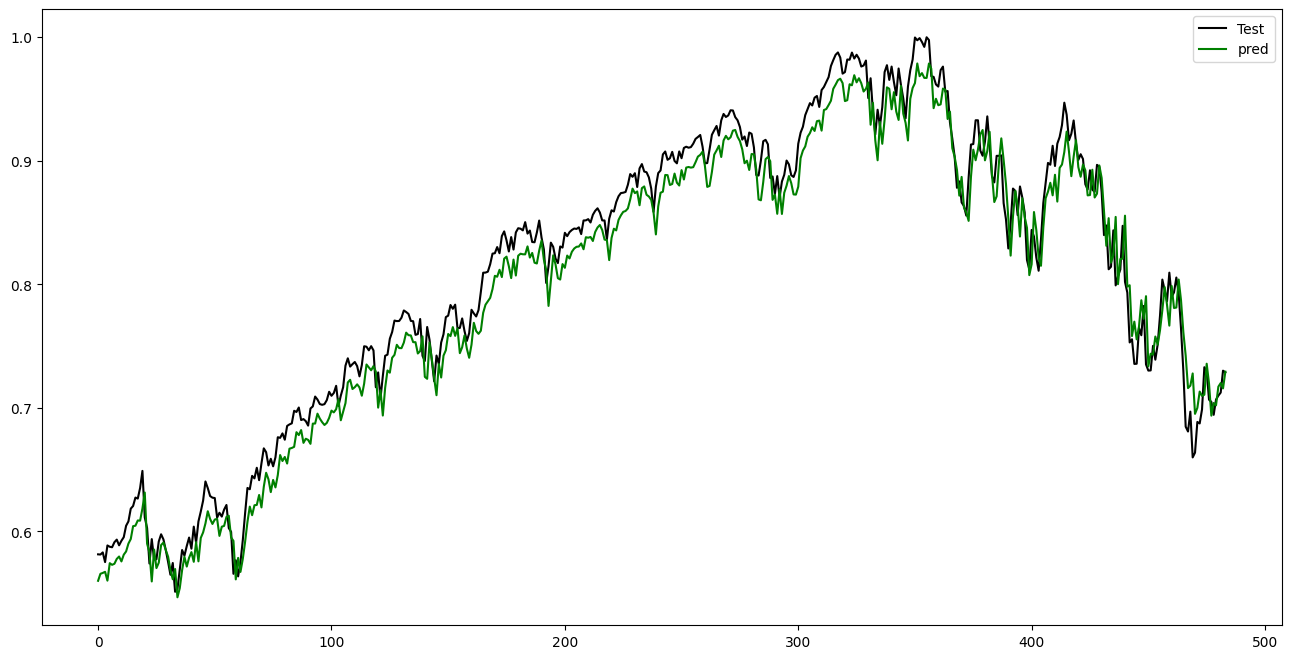

In [21]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()